CODE BLOCK: 1

# New Section

In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Insert the directory
import sys
sys.path.insert(0,"/content/drive/My Drive/TSOAI/S5")

In [ ]:
## All the libraries are imported
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchsummary

CODE BLOCK: 2

In [ ]:
# Check if Cuda is available otherwise set the device to CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

CODE BLOCK: 3

In [ ]:
# Train data transformations
#
train_transforms = transforms.Compose([
    # Randomly applies a center crop to the image with a probability of 0.1
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # Resizes the image to a size of (28, 28)
    transforms.Resize((28, 28)),
    # Randomly rotates the image within the range of -15 to 15 degrees
    # Fills the empty areas resulting from rotation with a value of 0
    transforms.RandomRotation((-15., 15.), fill=0),
    # Converts the image to a tensor
    transforms.ToTensor(),
    # Normalizes the image tensor using mean and standard deviation values
    # The mean and standard deviation values (0.1307, 0.3081) are used for standard normalization
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    # Converts the image to a tensor
    transforms.ToTensor(),
    # Normalizes the image tensor using mean and standard deviation values
    # The mean and standard deviation values (0.1307, 0.3081) are used for standard normalization
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [ ]:
#This line of code creates a dataset object for the MNIST dataset that will be used for training.
#The dataset will be downloaded (if not already present) and stored in the ../data directory. 
#The train=True argument indicates that the training split of the MNIST dataset is being used.
#download=True ensures that the dataset is downloaded from the internet if it is not already available locally.
#transform=train_transforms applies the set of transformations (train_transforms) to each sample in the training dataset. These transformations include random cropping, resizing, rotation, tensor conversion, and normalization.
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
#This line of code creates a dataset object for the MNIST dataset that will be used for testing
# train equals to false indicates it won't be used for training
# it downloads the file to the respective directory
# applies the tensor conversion,normalization
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [ ]:
# at one go 512 images would be processed
batch_size = 512
#This code defines a dictionary named kwargs that contains various arguments or parameters for configuring the behavior of a data loader.
#'batch_size': batch_size specifies the number of samples to include in each batch during data loading. The batch_size variable should be assigned a desired batch size value.
#'shuffle': True indicates that the data loader should shuffle the samples in each epoch. Shuffling the data helps to randomize the order in which samples are presented to the model during training, which can improve learning performance and prevent any potential bias.
#'num_workers': 2 specifies the number of worker processes to use for data loading. These worker processes load the data in parallel, which can speed up the data loading process. The value of 2 here suggests that two worker processes will be used.
#'pin_memory': True enables the data to be directly pinned in memory. This is useful when transferring data between the CPU and GPU during training. By pinning the memory, data transfer can be faster, especially when using CUDA-based computations with GPUs.
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
#This line creates a data loader object named test_loader using the torch.utils.data.DataLoader class. The data loader is responsible for loading data from the test_data dataset.
#The resulting test_loader object can be used to iterate over the test dataset in batches, providing easy access to the test samples for evaluation or inference.
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
#The resulting train_loader object can be used to iterate over the train dataset in batches, providing easy access to the training samples for training
#This line creates a data loader object named train_loader using the torch.utils.data.DataLoader class. The data loader is responsible for loading data from the train_data dataset.
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

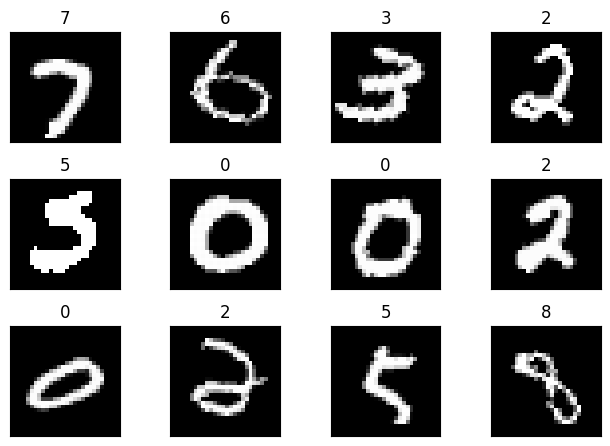

In [ ]:

#This line retrieves a batch of data and corresponding labels from the train_loader data loader.
#The iter() function is called on the train_loader object to create an iterator that can be used to sequentially access batches of data.
#The next() function is then called on the iterator to retrieve the next batch of data.
#batch_data refers to a batch of input data samples from the training dataset. Each sample in the batch represents an input to a machine learning model.
#batch_label refers to the corresponding labels for the input data samples in the batch. These labels represent the ground truth or target values associated with the input data.
#By calling next() on the iterator, a single batch of data and labels is retrieved for further processing or training.
batch_data, batch_label = next(iter(train_loader)) 
# setting up for the plotting of the images
fig = plt.figure()
# displays 12 images
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  # displaying the image by removing the 0th dimension,which is channel
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  # displaying the label 
  plt.title(batch_label[i].item())
  #This line modifies the x-axis of the current plot to remove the tick marks.
  plt.xticks([])
  #This line modifies the y-axis of the current plot to remove the tick marks.
  plt.yticks([])

CODE BLOCK: 7

In [ ]:
# from the utility.py import train and test functions
from utility import train,test
#from model.py import Net class where the model architecture is defined
from model import Net

CODE BLOCK: 8

CODE BLOCK: 9

CODE BLOCK: 10

In [ ]:
# Instantiate the object and move it to the device available (cuda or CPU)
model = Net().to(device)

#summary(model, input_size=(1, 28, 28))
#This line creates an optimizer object named optimizer using the Stochastic Gradient Descent (SGD) optimization algorithm.
#optim refers to the module in PyTorch that provides various optimization algorithms.

#SGD stands for Stochastic Gradient Descent, which is a widely used optimization algorithm in machine learning and deep learning.

#model.parameters() returns an iterable containing the parameters (i.e., weights and biases) of the model object. These are the learnable parameters that will be updated during training.

#lr=0.01 sets the learning rate for the optimizer. The learning rate determines the step size at each iteration during the optimization process. 
#momentum=0.9 sets the momentum for the optimizer. Momentum is a technique used to accelerate the optimization process by accumulating the gradients of past iterations. It helps the optimizer to move more confidently in the direction of steepest descent and overcome local minima. 
#The optimizer object will be used to update the model's parameters based on the computed gradients during the training process.

#optimizer.step() method to performs parameter update based on the computed gradients, and then call optimizer.zero_grad() to reset the gradients to zero before computing the gradients for the next batch.
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#This line creates a learning rate scheduler object named scheduler using the StepLR scheduler from the optim.lr_scheduler module in PyTorch.
#StepLR is a learning rate scheduler that adjusts the learning rate based on fixed step intervals.
#optimizer refers to the optimizer object that is being used to update the model's parameters during training. The scheduler will adjust the learning rate of this optimizer.
#step_size=15 specifies the number of epochs after which the learning rate will be decreased. In this case, the learning rate will be decreased every 15 epochs.
#gamma=0.1 determines the factor by which the learning rate will be multiplied. In this case, the learning rate will be multiplied by 0.1 at each step.
#verbose=True enables verbose output, meaning that information about the learning rate adjustments will be printed during training.

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
#creates a loss function object named criterion using the CrossEntropyLoss class from the nn module in PyTorch.
#The CrossEntropyLoss function combines the concepts of log_softmax (logarithm of softmax) and negative log likelihood loss into a single loss function.
#The CrossEntropyLoss function expects the input to be logits (raw outputs from the model) rather than probabilities. Therefore, there is no need to apply a softmax activation function to the model's output before using this loss function.
criterion = nn.CrossEntropyLoss()

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
# Number of Epochs or how many times the entire data is used for training
num_epochs = 20
# Looping for each of the epoch
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  ## Send the model , device , train_loader,optimizer and loss function to the train function
  train_accuracy,train_loss = train(model, device, train_loader, optimizer, criterion)
  # Append the train accuracy and train loss value of the ith epoch 
  train_acc.append(train_accuracy)
  train_losses.append(train_loss)
  ## Send the model,device,test_loader and loss function
  test_accuracy,test_loss = test(model, device, test_loader, criterion)
  #store the test and loss and test accuracy for this epoch
  test_losses.append(test_loss)
  test_acc.append(test_accuracy)
  #  learning rate of the optimizer will be adjusted according to the predefined schedule
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.5924 Batch_id=117 Accuracy=41.69: 100%|██████████| 118/118 [00:29<00:00,  3.95it/s]


Test set: Average loss: 0.0007, Accuracy: 8984/10000 (89.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1581 Batch_id=117 Accuracy=92.92: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0002, Accuracy: 9719/10000 (97.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0632 Batch_id=117 Accuracy=96.30: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 0.0002, Accuracy: 9746/10000 (97.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0864 Batch_id=117 Accuracy=96.96: 100%|██████████| 118/118 [00:22<00:00,  5.17it/s]


Test set: Average loss: 0.0001, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0979 Batch_id=117 Accuracy=97.50: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]


Test set: Average loss: 0.0001, Accuracy: 9826/10000 (98.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0176 Batch_id=117 Accuracy=97.78: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0001, Accuracy: 9864/10000 (98.64%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0920 Batch_id=117 Accuracy=98.07: 100%|██████████| 118/118 [00:21<00:00,  5.45it/s]


Test set: Average loss: 0.0001, Accuracy: 9873/10000 (98.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0654 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0001, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0713 Batch_id=117 Accuracy=98.35: 100%|██████████| 118/118 [00:23<00:00,  5.07it/s]


Test set: Average loss: 0.0001, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1089 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [00:23<00:00,  5.06it/s]


Test set: Average loss: 0.0001, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0851 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 0.0001, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0358 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0001, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0449 Batch_id=117 Accuracy=98.65: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.0001, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0125 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0000, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.1216 Batch_id=117 Accuracy=98.84: 100%|██████████| 118/118 [00:23<00:00,  5.08it/s]


Test set: Average loss: 0.0000, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1120 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:23<00:00,  5.12it/s]


Test set: Average loss: 0.0000, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0821 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 0.0000, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0060 Batch_id=117 Accuracy=99.18: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0000, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0016 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0000, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0802 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0000, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

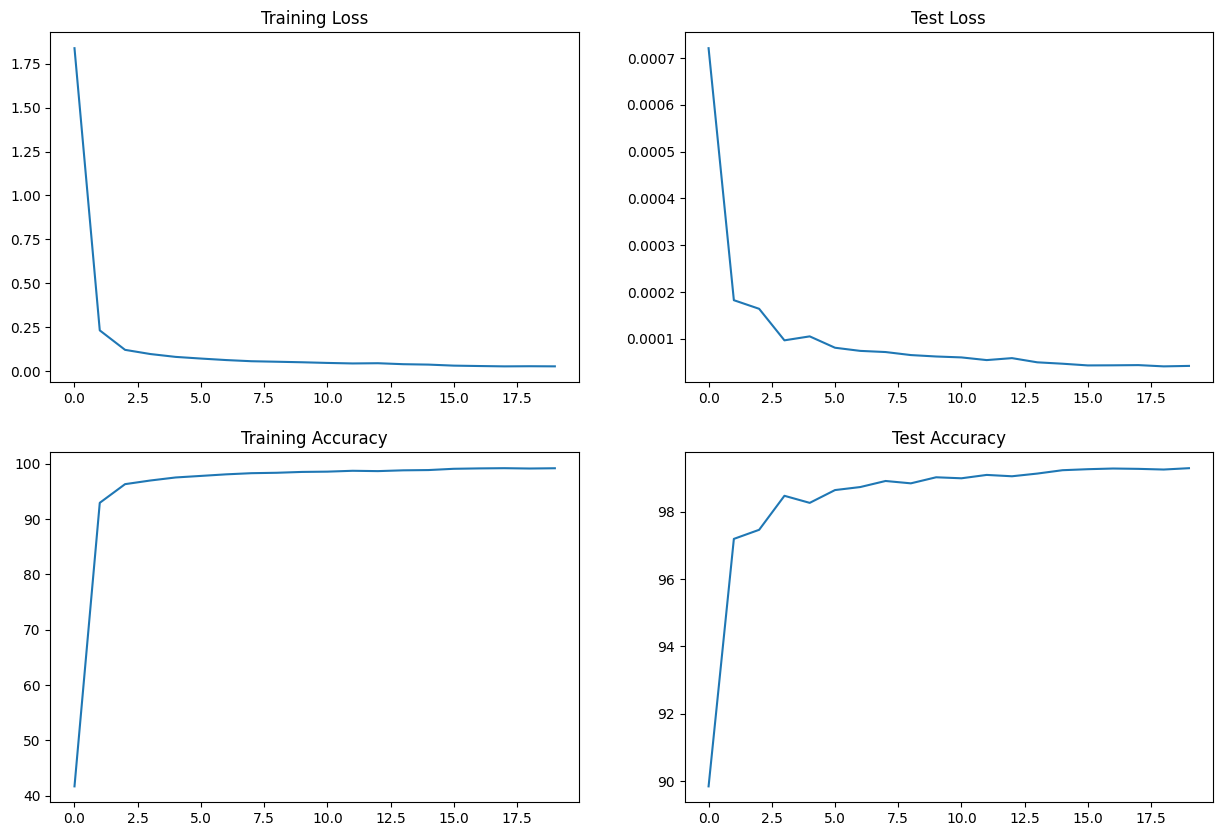

In [ ]:
# four plots are generated for train loss,train accuray ,test loss and test accuracy
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

# New Section